In [1]:
import re
import gc
import nltk
import numpy
import pandas

# Prep NLTK

In [2]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/jupyter/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/jupyter/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
from nltk.corpus import stopwords
stops = stopwords.words('english')

In [4]:
print(stops)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

# Load Message History

In [5]:
df = pandas.read_csv("messages.csv", delimiter="|")

We should remove all duckbot data

In [6]:
df = df[~(df["author"].isin(["tomasgotchi#7985","Lichthammer#5825","Ras#3571","Lord_Quebes#9246","Lance uppercut#8683","DuckBot#7214"]))]

In [7]:
df = df.dropna()

In [8]:
gc.collect()

0

In [9]:
df.head(5)

,channel,author,message
0,general,Davey Jonez#6500,then go skiing again the next day
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ..."
3,general,Dan#0075,leaving calgary temporarily?
4,general,Davey Jonez#6500,it involves leaving calgary.


In [10]:
df.shape

(10953, 3)

# Breakdown

### Channel Data

In [11]:
df["channel"].value_counts()

general       6291
games         2042
work           781
duckbutt       706
gluten         507
stonks         312
memes          240
toms-memes      64
dj-booth        10
Name: channel, dtype: int64

In [12]:
df["channel"].value_counts(normalize=True)

general       0.574363
games         0.186433
work          0.071305
duckbutt      0.064457
gluten        0.046289
stonks        0.028485
memes         0.021912
toms-memes    0.005843
dj-booth      0.000913
Name: channel, dtype: float64

- We can likely remove any messages for dj-booth, memes, and toms-memes
- The general channel accounts for most messages, we should avoid recomending the general channel

### Author Data

In [13]:
df["author"].value_counts()

twentylemon#2882            4432
Tomos#5313                  2319
Shmebulock#4334             1122
Davey Jonez#6500             791
Dan#0075                     499
chiko212#1472                498
gnot a gnelf#9605            444
Lally Monkey#4693            414
Rambotarzan#7446             206
LordAdmiralFluffson#4764     171
Beanybears#2713               34
cocoblu#2486                  23
Name: author, dtype: int64

In [14]:
df["author"].value_counts(normalize=True)

twentylemon#2882            0.404638
Tomos#5313                  0.211723
Shmebulock#4334             0.102438
Davey Jonez#6500            0.072218
Dan#0075                    0.045558
chiko212#1472               0.045467
gnot a gnelf#9605           0.040537
Lally Monkey#4693           0.037798
Rambotarzan#7446            0.018808
LordAdmiralFluffson#4764    0.015612
Beanybears#2713             0.003104
cocoblu#2486                0.002100
Name: author, dtype: float64

In [15]:
df["size"] = df["message"].str.len()

In [16]:
df.head(5)

,channel,author,message,size
0,general,Davey Jonez#6500,then go skiing again the next day,33
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60
3,general,Dan#0075,leaving calgary temporarily?,28
4,general,Davey Jonez#6500,it involves leaving calgary.,28


In [17]:
df.groupby("author")["size"].mean().reset_index().sort_values("size", ascending=False)

,author,size
2,Davey Jonez#6500,48.872314
8,chiko212#1472,43.757028
4,LordAdmiralFluffson#4764,41.935673
7,Tomos#5313,41.877965
3,Lally Monkey#4693,41.731884
9,cocoblu#2486,40.826087
0,Beanybears#2713,37.352941
6,Shmebulock#4334,35.235294
5,Rambotarzan#7446,32.961165
10,gnot a gnelf#9605,32.254505


In [18]:
df.groupby("author")["size"].median().reset_index().sort_values("size", ascending=False)

,author,size
2,Davey Jonez#6500,39.0
8,chiko212#1472,39.0
4,LordAdmiralFluffson#4764,32.0
0,Beanybears#2713,30.5
3,Lally Monkey#4693,30.0
7,Tomos#5313,28.0
10,gnot a gnelf#9605,28.0
5,Rambotarzan#7446,27.5
9,cocoblu#2486,26.0
1,Dan#0075,23.0


In [19]:
dd = df.groupby("author")["size"].sum().reset_index().sort_values("size", ascending=False)

In [20]:
dd

,author,size
11,twentylemon#2882,130891
7,Tomos#5313,97115
6,Shmebulock#4334,39534
2,Davey Jonez#6500,38658
8,chiko212#1472,21791
3,Lally Monkey#4693,17277
1,Dan#0075,14464
10,gnot a gnelf#9605,14321
4,LordAdmiralFluffson#4764,7171
5,Rambotarzan#7446,6790


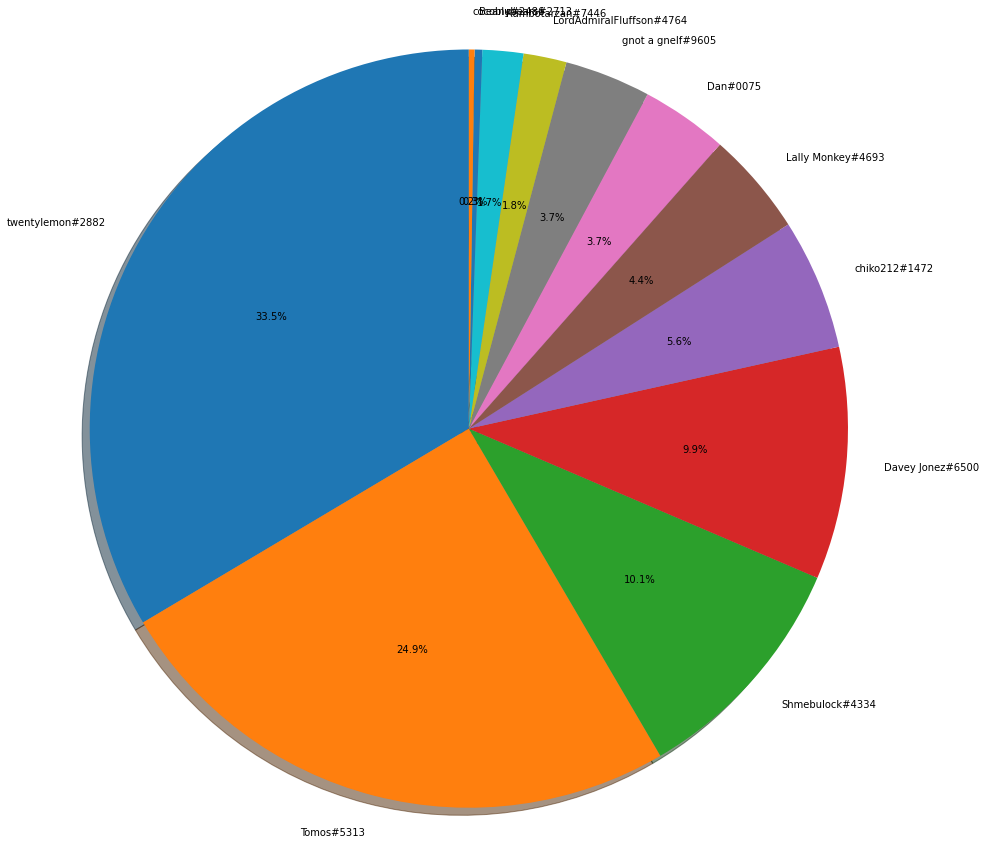

In [21]:
import matplotlib.pyplot as plt

# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = list(dd["author"].values)
sizes = list(dd["size"].values)

fig1, ax1 = plt.subplots(figsize=(15,15))
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig("lol.png")
plt.show()

# Fix Messages

In [22]:
df.head(5)

,channel,author,message,size
0,general,Davey Jonez#6500,then go skiing again the next day,33
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60
3,general,Dan#0075,leaving calgary temporarily?,28
4,general,Davey Jonez#6500,it involves leaving calgary.,28


In [23]:
def fix_message(x):
    x2 = str(x).lower()
    word_tokens = re.split(r'\W+', x2)
    filtered_tokens = [w for w in word_tokens if not w in stops]
    
    if len(filtered_tokens) > 0:
        return filtered_tokens
    else:
        return numpy.nan
# end def fix_message

In [24]:
df["fixed"] = df["message"].map(fix_message)

In [25]:
df.head(5)

,channel,author,message,size,fixed
0,general,Davey Jonez#6500,then go skiing again the next day,33,"[go, skiing, next, day]"
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101,"[instead, going, back, calgary, go, lake, loui..."
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60,"[yes, go, back, country, skiing, banff, away, ..."
3,general,Dan#0075,leaving calgary temporarily?,28,"[leaving, calgary, temporarily, ]"
4,general,Davey Jonez#6500,it involves leaving calgary.,28,"[involves, leaving, calgary, ]"


In [26]:
df["fixed_size"] = df['fixed'].str.len()

In [27]:
df.head(5)

,channel,author,message,size,fixed,fixed_size
0,general,Davey Jonez#6500,then go skiing again the next day,33,"[go, skiing, next, day]",4.0
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101,"[instead, going, back, calgary, go, lake, loui...",11.0
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60,"[yes, go, back, country, skiing, banff, away, ...",9.0
3,general,Dan#0075,leaving calgary temporarily?,28,"[leaving, calgary, temporarily, ]",4.0
4,general,Davey Jonez#6500,it involves leaving calgary.,28,"[involves, leaving, calgary, ]",4.0


In [28]:
df.isna().sum()

channel         0
author          0
message         0
size            0
fixed         218
fixed_size    218
dtype: int64

In [29]:
df[df["fixed"].isna()].head(5)

,channel,author,message,size,fixed,fixed_size
50,general,twentylemon#2882,so,2,NaN,NaN
69,general,twentylemon#2882,this,4,NaN,NaN
202,general,twentylemon#2882,what about,10,NaN,NaN
247,general,twentylemon#2882,i have not,10,NaN,NaN
383,general,Shmebulock#4334,off,3,NaN,NaN


In [30]:
df = df.dropna()
df = df[df["fixed_size"] > 1]
gc.collect()

153

In [31]:
df.head(5)

,channel,author,message,size,fixed,fixed_size
0,general,Davey Jonez#6500,then go skiing again the next day,33,"[go, skiing, next, day]",4.0
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101,"[instead, going, back, calgary, go, lake, loui...",11.0
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60,"[yes, go, back, country, skiing, banff, away, ...",9.0
3,general,Dan#0075,leaving calgary temporarily?,28,"[leaving, calgary, temporarily, ]",4.0
4,general,Davey Jonez#6500,it involves leaving calgary.,28,"[involves, leaving, calgary, ]",4.0


In [32]:
df = df[~(df["message"].str.contains("http"))]
gc.collect()

58

In [33]:
df.shape

(8082, 6)

In [34]:
df.head(5)

,channel,author,message,size,fixed,fixed_size
0,general,Davey Jonez#6500,then go skiing again the next day,33,"[go, skiing, next, day]",4.0
1,general,Davey Jonez#6500,then instead of going back to calgary you go t...,101,"[instead, going, back, calgary, go, lake, loui...",11.0
2,general,Davey Jonez#6500,"yes. to go back country skiing in banff, away ...",60,"[yes, go, back, country, skiing, banff, away, ...",9.0
3,general,Dan#0075,leaving calgary temporarily?,28,"[leaving, calgary, temporarily, ]",4.0
4,general,Davey Jonez#6500,it involves leaving calgary.,28,"[involves, leaving, calgary, ]",4.0


In [35]:
df.to_csv("clean_messages.csv", index=False, sep="|")

TypeError: to_csv() got an unexpected keyword argument 'delimiter'